In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlub2021-session1/sampleSubmission.csv
/kaggle/input/mlub2021-session1/train_set.csv
/kaggle/input/mlub2021-session1/test_set.csv/test_set.csv


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


In [3]:
train_set = pd.read_csv('/kaggle/input/mlub2021-session1/train_set.csv',index_col=0) 
test_set = pd.read_csv('/kaggle/input/mlub2021-session1/test_set.csv/test_set.csv',index_col=0) 

## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [4]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [5]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [6]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.
len(set(train_set.Address))

5400

In [7]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [9]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

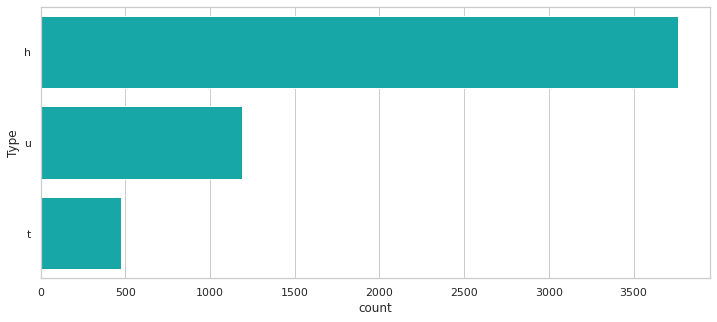

In [10]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

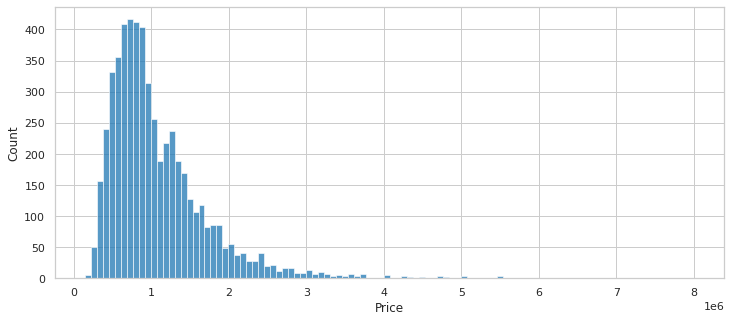

In [11]:
sns.histplot(train_set["Price"])
plt.show()

## BASELINE MODEL
### https://www.kaggle.com/c/mlub2021-session1/notebooks

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 397813.8038017269
R^2:  0.6219552116625728


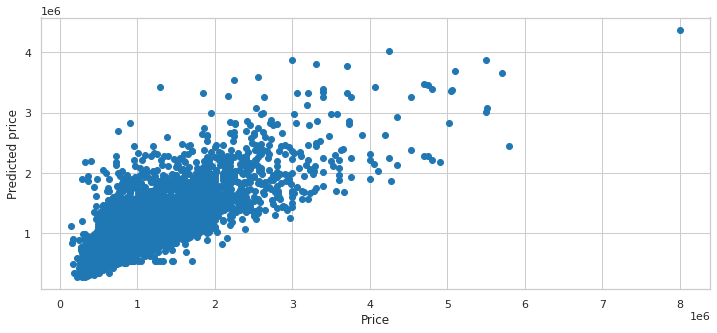

In [12]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('baseline.csv',index=False)

## EXERCICE - TRAIN A MODE, and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


### Model utilitzat
Jo utilitzaré Knn, ja que dóna una precisió millor en tenir en compte a diversos veïns propers. La regressió lineal ens fixa que la progressió dels preus ha de ser lineal per a les nostres features, la qual cosa no es compleix.

----- EVALUATION ON TRAIN SET ------
RMSE 370824.9977513484
R^2:  0.6715104460405242


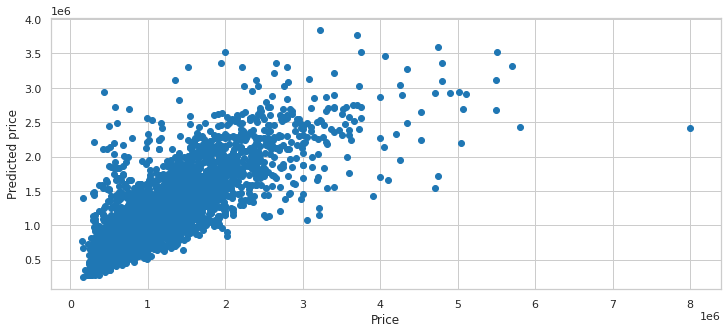

In [13]:
## the features
###CEL·LA QUE GENERA LA SUBMISSION
features = ['Rooms','Landsize', 'BuildingArea','Postcode','Propertycount','Lattitude','Longtitude','Bathroom']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 4 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('baselineD.csv',index=False)

In [14]:
"""Si mirem les dades, hi algunes que es probable que li aportin valor, Com el nombre d'habitacions, lavabos, nombre d'espais d'aparcament, posició..."""
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [15]:
"""Alguns camps tenen una tasa molt alta de nan's. Aquests poden ser un problema i afectar a les nostres prediccions. Que podem fer per eliminar-los?"""
print((train_set.isna()).sum(axis=0))
print(train_set.shape)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                25
Landsize            0
BuildingArea     2542
YearBuilt        2130
CouncilArea       553
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
(5432, 21)


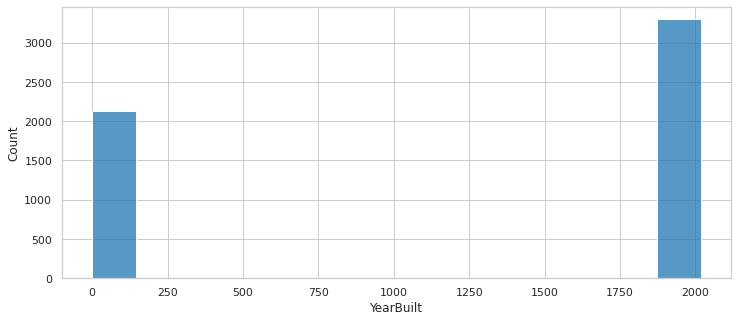

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [16]:
"""Una gran part de dates de construcció son na"""
sns.histplot(train_set["YearBuilt"].fillna(0))
plt.show()
train_set.head()

In [17]:
"""Com knn treballa amb distancies és important normalitzar les dades, ja que si no ho fem alguns features tenen molta més relevancia que altres"""
"""Per omplir els valors na, en comptes de posar tots els valors a 0, la qual cosa podria distorsionar les nostres prediccions, podem 
posar altres valors que tinguin més sentit com per exemple la mitjana aritmètica, la mediana, o si volem ser més precisos es posible 
utilitzar knn per intentar esbrinar quins serien els valors aproximats d'aquests valors en blanc utilitzant el dels seus veins més propers"""

from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# split into input and output elements
filtered_train_set = train_set.copy()
train = filtered_train_set.sample(frac=0.8,random_state=200)
test  = filtered_train_set.drop(train.index)
X = train[features]
y = train[['Price']]

valX = test[features]
valy = test[['Price']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrans = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
Xtrans = pd.DataFrame(imputer.fit_transform(Xtrans),columns = Xtrans.columns)
Xtrans.head()

,Rooms,Landsize,BuildingArea,Postcode,Propertycount,Lattitude,Longtitude,Bathroom
0,0.285714,0.002674,0.004133,0.123849,0.684822,0.445571,0.484953,0.375
1,0.571429,0.011371,0.004718,0.194473,0.207187,0.287840,0.529786,0.250
2,0.285714,0.013798,0.002763,0.030706,0.742063,0.361310,0.150028,0.125
3,0.285714,0.008427,0.003482,0.077789,0.495602,0.718283,0.497809,0.250
4,0.285714,0.014697,0.004363,0.038895,0.232680,0.622583,0.252169,0.375


----- EVALUATION ON TRAIN SET ------
RMSE 352751.53487270296
R^2:  0.7027503293173896


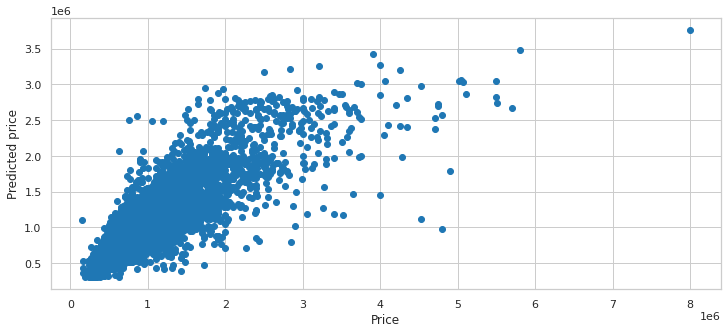

In [18]:
## the features
"""Podem afegir més features amb valors quantitatius que podrien donar certa informació sobre el preu. Les cases amb posició o codi postal similar poden tenir preus similars, el 
nombre d'habitacions, l'any de construcció..."""

features = ['Rooms','Landsize', 'BuildingArea','YearBuilt','Bathroom','Car','Postcode','Distance','Lattitude','Longtitude']

## DEFINE YOUR FEATURES
# split into input and output elements
filtered_train_set = train_set.copy()
train = filtered_train_set
X = train[features]
y = train[['Price']]

"""Com knn treballa amb distancies és important normalitzar les dades, ja que si no ho fem alguns features tenen molta més relevancia que altres"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrans = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

"""Per omplir els valors na, en comptes de posar tots els valors a 0, la qual cosa podria distorsionar les nostres prediccions, podem 
posar altres valors que tinguin més sentit com per exemple la mitjana aritmètica, la mediana, o si volem ser més precisos es posible 
utilitzar knn per intentar esbrinar quins serien els valors aproximats d'aquests valors en blanc utilitzant el dels seus veins més propers"""

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
Xtrans = pd.DataFrame(imputer.fit_transform(Xtrans),columns = Xtrans.columns)


"""Com knn treballa amb distàncies, si normalitzem les features cadascuna té exactament la mateixa relevancia quan fem la predicció.
Però, en aquest cas això no és així, ja que hi ha features que tenen un impacte molt més directe en el preu que altres, per tant podem jugar 
i multiplicar els valors de cada columna per a que tinguin més o menys relevancia en el nostre model i així obtenir un menor error."""

roomsModifier = 2
landsizeModifier = 0
BuildingAreaModifier = 2
yearBuiltModifier = 1
bathroomModifier = 1 
carModifier = 1
PostcodeModifier = 4
DistanceModifier = 2
LattitudeModifier = 2
LongtitudeModifier = 2

Xtrans['Rooms'] *= roomsModifier
Xtrans['Landsize'] *= landsizeModifier
Xtrans['BuildingArea'] *= BuildingAreaModifier
Xtrans['YearBuilt'] *= yearBuiltModifier
Xtrans['Bathroom'] *= bathroomModifier
Xtrans['Car'] *= carModifier
Xtrans['Postcode'] *= PostcodeModifier
Xtrans['Distance'] *= DistanceModifier
Xtrans['Lattitude'] *= LattitudeModifier
Xtrans['Longtitude'] *= LongtitudeModifier

## the model

# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 15 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(Xtrans,y)

## predict training set
y_pred = model.predict(Xtrans)

## Evaluate the model and plot it

from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))

plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
"""Hem d'escalar i modificar les dades de test de manera simètrica com ho hem fet de les dades d'entrenament"""
X_test = test_set[features]
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

imputer = KNNImputer(n_neighbors=5)
X_test_norm = pd.DataFrame(imputer.fit_transform(X_test_norm),columns = X_test_norm.columns)

X_test_norm['Rooms'] *= roomsModifier
X_test_norm['Landsize'] *= landsizeModifier
X_test_norm['BuildingArea'] *= BuildingAreaModifier
X_test_norm['YearBuilt'] *= yearBuiltModifier
X_test_norm['Bathroom'] *= bathroomModifier
X_test_norm['Car'] *= carModifier
X_test_norm['Postcode'] *= PostcodeModifier
X_test_norm['Distance'] *= DistanceModifier
X_test_norm['Lattitude'] *= LattitudeModifier
X_test_norm['Longtitude'] *= LongtitudeModifier

y_pred = model.predict(X_test_norm)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('submission.csv',index=False)

In [19]:
print((test_set == 0).sum(axis=0))


Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            4
Postcode            0
Bedroom2            6
Bathroom           17
Car               626
Landsize         1193
BuildingArea        9
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


Explain the choosed model and why you think that is is the best

In [20]:
"""Per tal de fer una millor predicció de quina serà la precisió del nostre model avans de fer una submission, separem algunes 
dades del conjunt d'entrenament per veure una tassa d'error aproximada, encara que per fer la submission s'utilitzen totes. Comparar les prediccions obtingudes
amb dades d'entrenament ens pot portar a confusió, ja el model hauria de ser capaç de predir valors per noves dades, i no només les del conjunt d'entrenament"""

## the features
def simulate(x):
    features = ['Rooms','Landsize', 'BuildingArea','YearBuilt','Bathroom','Car','Postcode','Distance','Lattitude','Longtitude']
    ## DEFINE YOUR FEATURES

    #Construct new train_set with filtered data
    from numpy import isnan
    from sklearn.impute import KNNImputer

    # split into input and output elements
    filtered_train_set = train_set.copy()
    train = filtered_train_set.sample(frac=0.7,random_state = x)
    test  = filtered_train_set.drop(train.index)

    X = train[features]
    y = train[['Price']]

    valX = test[features]
    valy = test[['Price']]

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    Xtrans = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    Xtrans = pd.DataFrame(imputer.fit_transform(Xtrans),columns = Xtrans.columns)


    valXtrans = pd.DataFrame(scaler.fit_transform(valX), columns = valX.columns)
    imputer = KNNImputer(n_neighbors=5)
    valXtrans = pd.DataFrame(imputer.fit_transform(valXtrans),columns = valXtrans.columns)

    roomsModifier = 2
    landsizeModifier = 0
    BuildingAreaModifier = 2
    yearBuiltModifier = 1
    bathroomModifier = 1 
    carModifier = 1
    PostcodeModifier = 4
    DistanceModifier = 2
    LattitudeModifier = 2
    LongtitudeModifier = 2

    Xtrans['Rooms'] *= roomsModifier
    valXtrans['Rooms'] *= roomsModifier
    Xtrans['Landsize'] *= landsizeModifier
    valXtrans['Landsize'] *= landsizeModifier
    Xtrans['BuildingArea'] *= BuildingAreaModifier
    valXtrans['BuildingArea'] *= BuildingAreaModifier
    Xtrans['YearBuilt'] *= yearBuiltModifier
    valXtrans['YearBuilt'] *= yearBuiltModifier
    Xtrans['Bathroom'] *= bathroomModifier
    valXtrans['Bathroom'] *= bathroomModifier
    Xtrans['Car'] *= carModifier
    valXtrans['Car'] *= carModifier
    Xtrans['Postcode'] *= PostcodeModifier
    valXtrans['Postcode'] *= PostcodeModifier
    Xtrans['Distance'] *= DistanceModifier
    valXtrans['Distance'] *= DistanceModifier
    Xtrans['Lattitude'] *= LattitudeModifier
    valXtrans['Lattitude'] *= LattitudeModifier
    Xtrans['Longtitude'] *= LongtitudeModifier
    valXtrans['Longtitude'] *= LongtitudeModifier

    ## the model

    # KNeighborsRegressor
    from sklearn import neighbors
    n_neighbors = 15# you can modify this paramenter (ONLY THIS ONE!!!)
    model = neighbors.KNeighborsRegressor(n_neighbors)
    from sklearn.linear_model import LinearRegression

    ## fit the model

    model.fit(Xtrans,y)

    ## predict training set

    y_pred = model.predict(valXtrans)

    ## Evaluate the model and plot it
    return np.sqrt(mean_squared_error(valy, y_pred))
                   


In [21]:
"""Evaluació mitjana per diferents splits del conjunt de validació"""
rmse = 0
for x in range(20):
    rmse += simulate(x)
print(rmse/20)

409490.4651621039


In [22]:
"""El barri pot ser una informació útil per fer la nostra predicció. Podriem convertir cada etiqueta de barri per un identificador numèric?"""
filtered_train_set = train_set.copy()
suburbs_list = list(filtered_train_set.Suburb)
suburbs_dict = {suburbs_list[x]: x for x in range(len(suburbs_list))}
filtered_train_set.Suburb = [suburbs_dict[item] for item in filtered_train_set.Suburb]
filtered_train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,5303,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,5420,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,5240,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,5385,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,5366,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


### Conclusions final:

Al final, he aconseguit més puntuació canviant 4 paràmetres del codi base que no intentant normalitzar valors i substituir els nans amb altres mètodes. A vegades una aproximació al problema molt més simple és molt més efectiva que una de rebuscada. Tot i això crec que m'ha servit per entendre millor les dades i de pas he investigat sobre possibles mètodes i solucions que poden ser aplicats a problemes de machine learning.